In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Input Data ##################################################

Lx = 0.4      #[m]
Ly = 0.4      #[m]
dx = 0.01     #[m]
dy = 0.01     #[m]
dt = 0.0001    #[s]
t_max = 3     #[s]    
nu = 0.01     #[s/m^2]
U = 5         #[m/s]

tol = 1e-5

# Meshing

x = np.arange(0, Lx+dx, dx)
Nx = len(x) - 1
y = np.arange(0, Ly+dy, dy)
Ny = len(y) - 1
t = np.arange(0, t_max+dt, dt)
num_timesteps = int(len(t) - 1)


# Define Initial condition:
u_plot_plot_ploto = 0
vo = 0

In [11]:
 # Argon Physical Properties
rho = 1.633             #[kg/m^3]  Density
C = 520                 #[J/kg-K]  Specific Heat Capacit
alpha = 2.2e-5          #[m^2/s]   Thermal diffusivity
mu = 3.77e-5            #[Pa-s]    Dynamic viscosity

#Meshing
Lx = 0.4      #[m]
Ly = 0.4      #[m]
dx = 0.005     #[m]
dy = 0.005     #[m]
dt = 0.002   #[s]
t_max = 2     #[s]    
x = np.arange(0, Lx+dx, dx)
Nx = len(x) - 1
y = np.arange(0, Ly+dy, dy)
Ny = len(y) - 1
t = np.arange(0, t_max+dt, dt)
num_timesteps = int(len(t) - 1)
# Inlet
inlet_height = 0.3
inlet_size = 0.05
outlet_height = 0.15
outlet_size = 0.05

In [12]:
print('Number of points (x-direction): {0:2d} '.format(Nx+1))
print('Number of points (y-direction): {0:2d} '.format(Ny+1))
print('Mesh size (dx): {0:.8f} mm'.format(dx))
print('Mesh size (dy): {0:.8f} mm'.format(dy))
print('Number of time steps: {0:2d} '.format(num_timesteps))
print('Time step (dt): {0:.8f} s'.format(dt))


Number of points (x-direction): 81 
Number of points (y-direction): 81 
Mesh size (dx): 0.00500000 mm
Mesh size (dy): 0.00500000 mm
Number of time steps: 1000 
Time step (dt): 0.00200000 s


In [13]:
u = np.zeros((Nx, Ny+1))
v = np.zeros((Nx+1, Ny)) # Apply boundary condition on index Nx-1
p = np.zeros((Nx+1, Ny+1))

In [14]:
#Bottom wall
u[:,1] = - u[:,0]
v[:,0] = 0

# Left wall
u[0,:] = 0
v[1,:] = - v[0,:]

# Right wall
u[-1,:] = 0
v[-2,:] = - v[-1,:]

# Top wall
u[:,-2] = 6 - u[:,-1]
v[:,-1] = 0

In [15]:
for n in range(20):
    # IMPOSE BOUNDARY CONDITIONS

    """print(u)
    u_plot = (u[:,1:] + u[:,:-1])/2
    print(u_plot)"""
    # A (Convective term)
    # Structure to understand

    A_u = -(((u[1:-1,1:-2] + u[2:,1:-2])/2)**2 - ((u[1:-1,1:-2] + u[0:-2,1:-2])/2)**2)/dx + (((u[1:-1,2:-1] + u[1:-1,1:-2])/2)*((v[2:-1,1:-1] + v[1:-2,1:-1])/2) - ((u[1:-1,1:-2] + u[1:-1,:-3])/2)*((v[1:-2,0:-2] + v[2:-1,0:-2])/2))/dy
    A_v = -(((v[1:-2,1:-1] + v[2:-1,1:-1])/2)*((u[1:-1,1:-2] + u[1:-1,:-3])/2) - ((v[1:-2,1:-1] + v[:-3,1:-1])/2)*((u[0:-2,2:-1] + u[0:-2,1:-2])/2))/dx + (((v[1:-2,1:-1] + v[1:-2,2:])/2)**2 - ((v[1:-2,1:-1] + v[1:-2,0:-2])/2)**2)/dy
    """print(np.shape(A_u))
    print(np.shape(A_v))"""
    # B (Diffusion term)
    B_u = nu*((u[2:,1:-2] - 2*u[1:-1,1:-2] + u[0:-2,1:-2])/dx**2) 
    B_v = nu*((v[1:-2,2:] - 2*v[1:-2,1:-1] + v[1:-2,0:-2])/dy**2) 
    """print(np.shape(B_u))
    print(np.shape(B_v))"""

    # Step 1 - Compute u_temp and v_temp (u* in the discretization)
    u_temp = u.copy()
    v_temp = v.copy()
    u_temp[1:-1, 1:-2] += dt*(A_u + B_u)
    v_temp[1:-2, 1:-1] += dt*(A_v + B_v)

    # Boundary conditions on u* and v*
    u_temp[:,1] = - u_temp[:,0]
    v_temp[:,0] = 0

    # Left wall
    u_temp[0,:] = 0
    v_temp[1,:] = - v_temp[0,:]

    # Right wall
    u_temp[-1,:] = 0
    v_temp[-2,:] = - v_temp[-1,:]

    # Top wall
    u_temp[:,-2] = 6 - u_temp[:,-1]
    v_temp[:,-1] = 0


    # Step 2 - Poisson iterative solver for p(n+1)
    error = 1
    p[:,-1] = p[:,-2]   # dp/dy = 0 at x = -2
    p[0,:] = p[1,:]     # dp/dy = 0 at y = 0
    p[:,0] = p[:,1]     # dp/dx = 0 at x = 0
    p[-1,:] = p[-2,:]   # p = 0 at y = -2 ????
    p[-2,1] = 1
        



    p_ref = p.copy()
    while error > tol:

        """p[:,-2] = p[:,-1]  
        p[1,:] = p[0,:]    
        p[:,1] = p[:,0]    
        p[-2,:] = p[-1,:]  """

        p[1:-1,1:-1] = (p_ref[:-2,1:-1] + p_ref[2:,1:-1] + p_ref[1:-1,:-2] + p_ref[1:-1,2:])/4 - dx**2* rho/(4*dt)*((u_temp[1:,1:-1] - u_temp[0:-1,1:-1])/(dx) + (v_temp[1:-1,1:] - v_temp[1:-1,0:-1])/(dy))
        # adding boundary conditions
        #p[30:40,-1] = 4    # Outlet condition

        error =  np.linalg.norm(p-p_ref)

        """p[:,-1] = p[:,-2]  
        p[0,:] = p[1,:]    
        p[:,0] = p[:,1]    
        p[-1,:] = p[-2,:]  """

        p_ref = p.copy()


    # Compute u(n+1) and v(n+1)
    u = u_temp - dt*((p[1:,:] - p[:-1,:])/(dx))
    v = v_temp - dt*((p[:,1:] - p[:,:-1])/(dy))

    u[:,1] = - u[:,0]
    v[:,0] = 0

    # Left wall
    u[0,:] = 0
    v[1,:] = - v[0,:]

    # Right wall
    u[-1,:] = 0
    v[-2,:] = - v[-1,:]

    # Top wall
    u[:,-2] = 6 - u[:,-1]
    v[:,-1] = 0

KeyboardInterrupt: 

KeyboardInterrupt: 

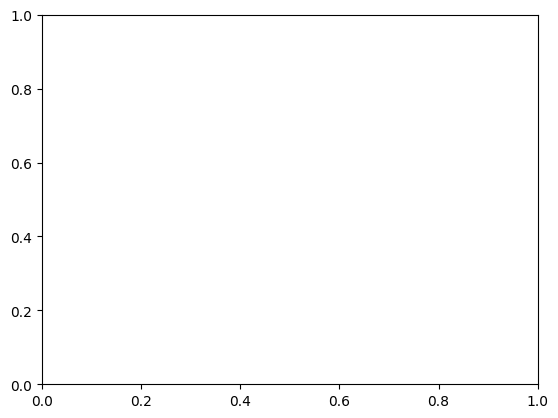

In [ ]:
xx, yy = np.meshgrid(x[:-1],y[:-1])

"""u_plot = (u[:,1:] + u[:,:-1])/2
v_plot = (v[1:,:] + v[:-1,:])/2"""

u_plot = u[:,1:]
v_plot = v[1:,:]
    
plt.streamplot(xx,yy,u_plot.T, v_plot.T, color=np.sqrt(u_plot.T*u_plot.T + v_plot.T*v_plot.T),density=1.5,linewidth=1.5, cmap=plt.cm.viridis)
plt.colorbar(label = 'velocity [m/s]')
plt.xlabel('x [m]',fontsize = 14 )
plt.ylabel('y [m]',fontsize = 14 )
plt.title('Streamlines', fontsize = 14)
plt.tick_params(labelsize=12)
plt.ylim([0,0.4])
plt.xlim([0,0.4])
plt.show()

In [ ]:
print(np.shape(xx))
print(np.shape(yy))


(80, 80)
(80, 80)


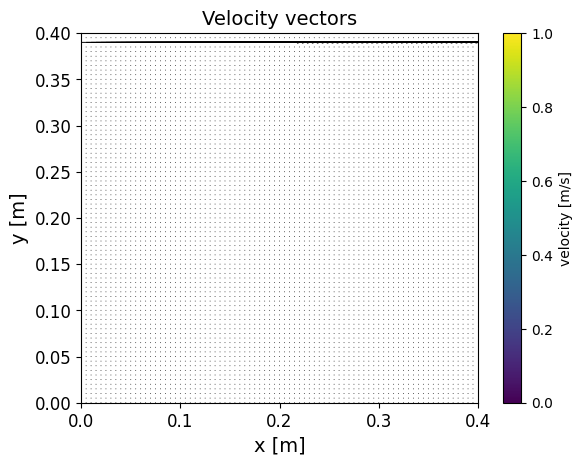

In [ ]:
plt.quiver(xx, yy, u_plot.T, v_plot.T)

plt.xlabel('x [m]',fontsize = 14 )
plt.ylabel('y [m]',fontsize = 14 )
plt.title('Velocity vectors', fontsize = 14)
plt.colorbar(label = 'velocity [m/s]')
plt.tick_params(labelsize=12)
plt.ylim([0,0.4])
plt.xlim([0,0.4])
plt.show()        